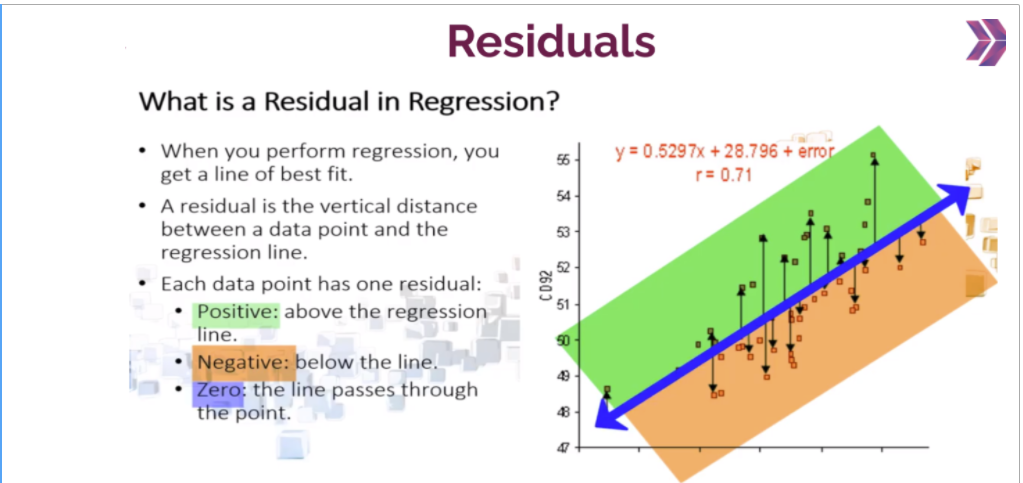

**aşağıdaki lieer regresyona uygun değil**

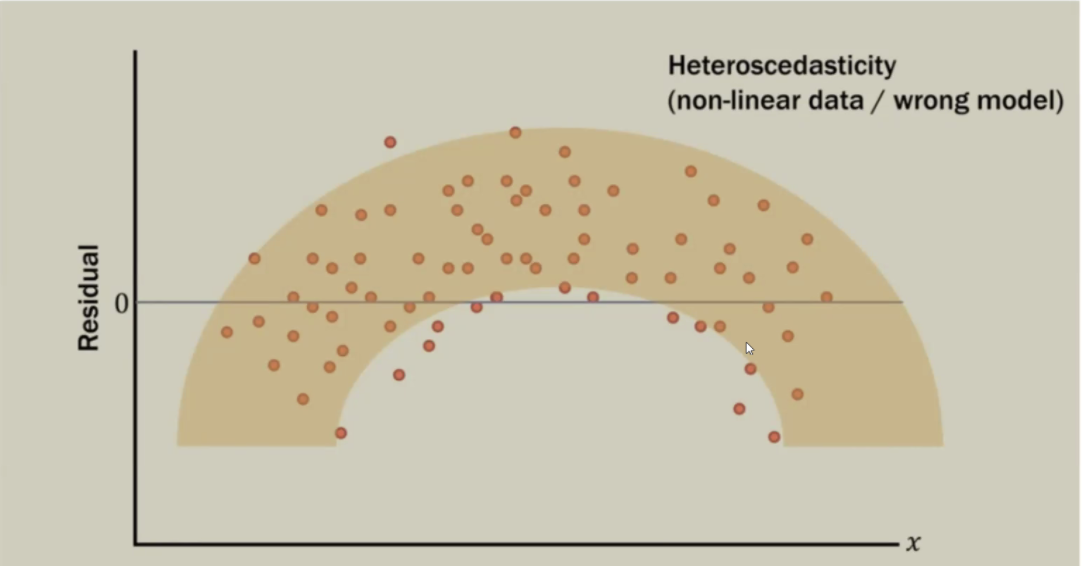

**aşağıdaki lineer regresyona uygun**

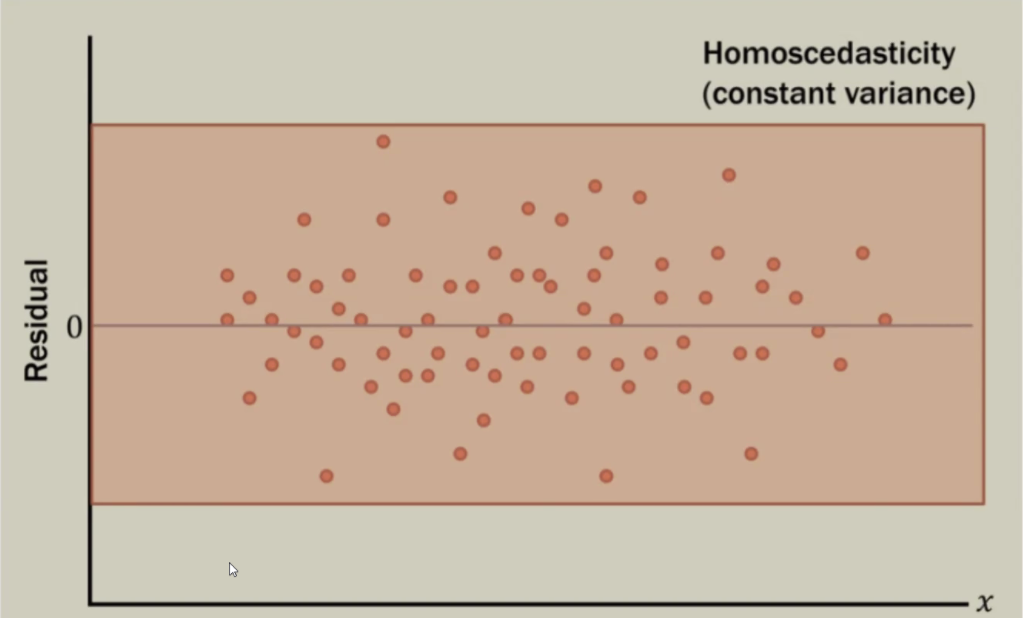

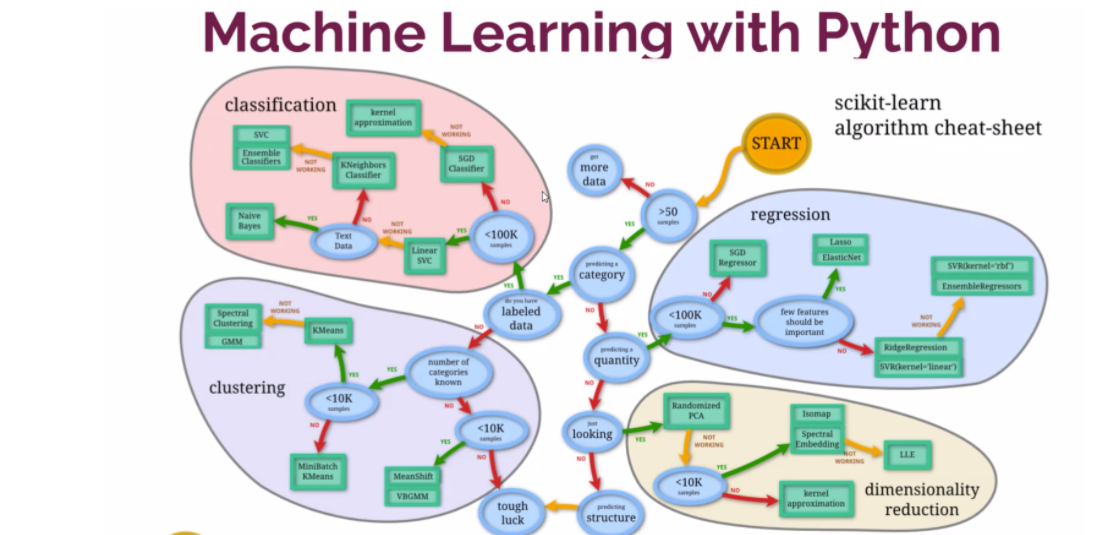

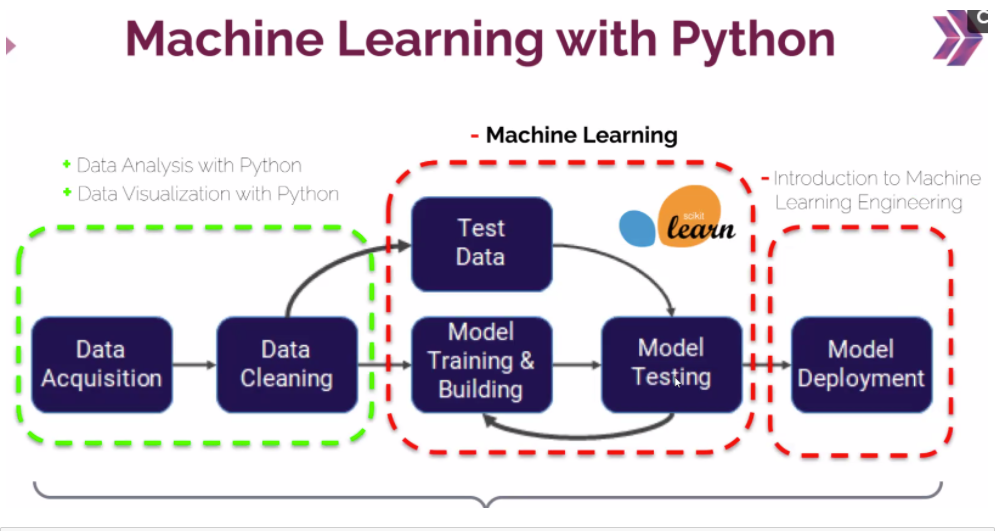

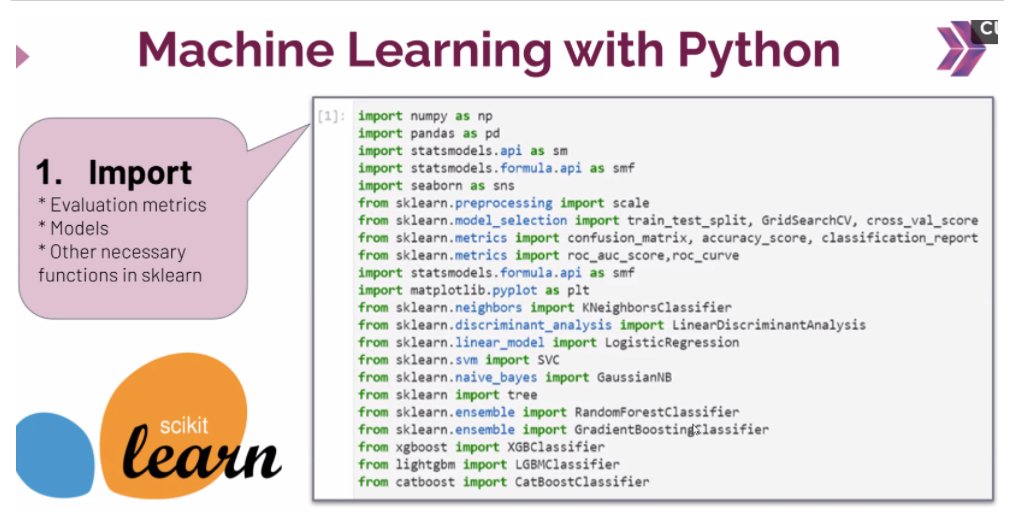

In [1]:
**********************************************************************************

SyntaxError: invalid syntax (<ipython-input-1-c2fb36767fde>, line 1)

## HANDS-ON BÖLÜMÜ

## Multiple Linear Regression

## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [ ]:
df.shape

In [ ]:
df.info

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

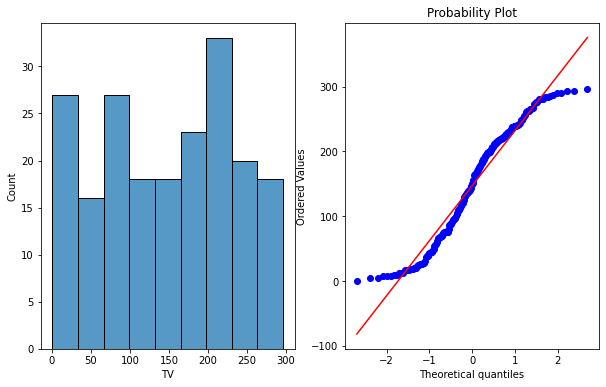

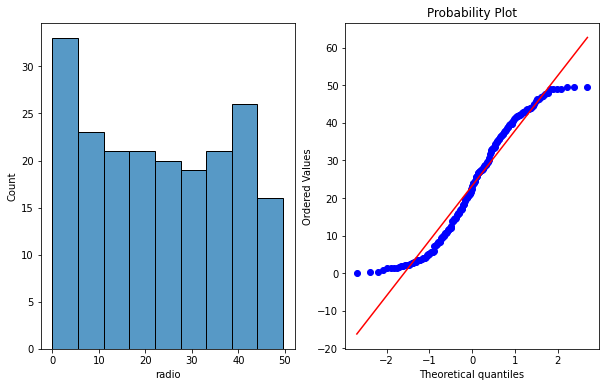

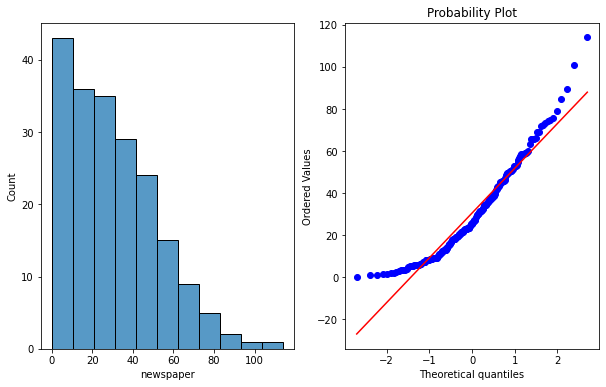

In [8]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [7]:
# pip install scikit-learn

from scipy.stats import skew

# skewness ına bakalım

In [8]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


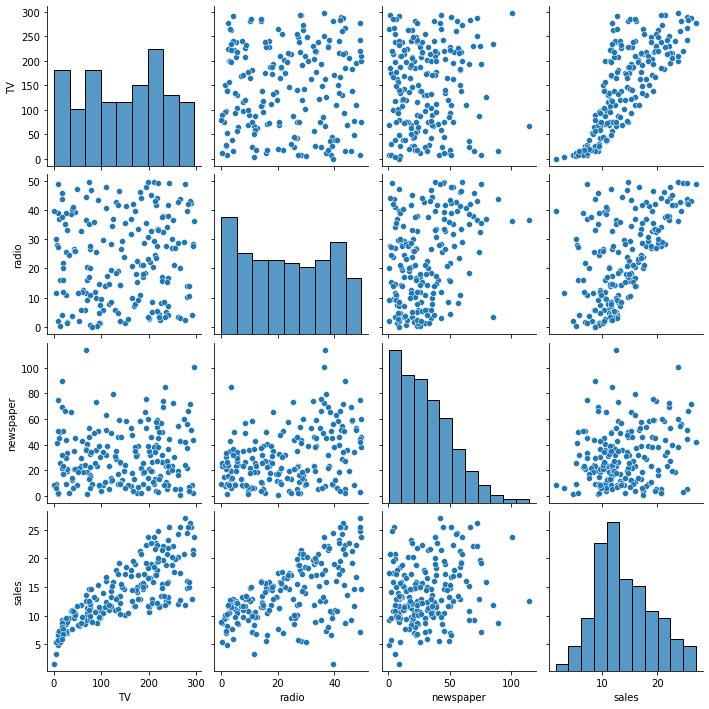

In [15]:
sns.pairplot(df)

<AxesSubplot:>

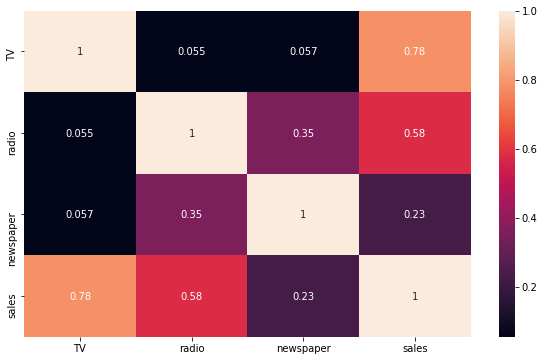

In [12]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [ ]:
# pip install scikit-learn

In [9]:
X = df.drop(columns = "sales")  # df.[["TV", "radio", "newspaper"]]

y = df["sales"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# test_size = 0.3 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# random_state=42 ile 42'yi kullandığım her defasında aynı train ve test datasını alacak. 
# mesela aynı datada çalışırken takım arkadaşlarınızla skorlarınızı karşılaştırabilmeniz için bunu aynı rakam girmelisin. 
# ki anlamlı bir karşılaştırma yapabilesiniz.

In [21]:
df.sample(15)

,TV,radio,newspaper,sales
157,149.8,1.3,24.3,10.1
27,240.1,16.7,22.9,15.9
109,255.4,26.9,5.5,19.8
158,11.7,36.9,45.2,7.3
37,74.7,49.4,45.7,14.7
193,166.8,42.0,3.6,19.6
138,43.0,25.9,20.5,9.6
133,219.8,33.5,45.1,19.6
42,293.6,27.7,1.8,20.7
59,210.7,29.5,9.3,18.4


In [12]:
print("X_train features shape :", X_train.shape)
print("y_train features shape :", y_train.shape)
print("X_test features shape :", X_test.shape)
print("y_test features shape :", y_test.shape)

X_train features shape : (140, 3)
y_train features shape : (140,)
X_test features shape : (60, 3)
y_test features shape : (60,)


In [13]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [23]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

# model fit edildikten sonra modelim featureların katsayılarını belirledi. model.fit ettikten sonra artık feature a katsayılar atandı.
# artık modelim o katsayılara göre o eğime göre tahminlerini yapabilir.

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [18]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [19]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [20]:
result_sample = comparing.head(25)

result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


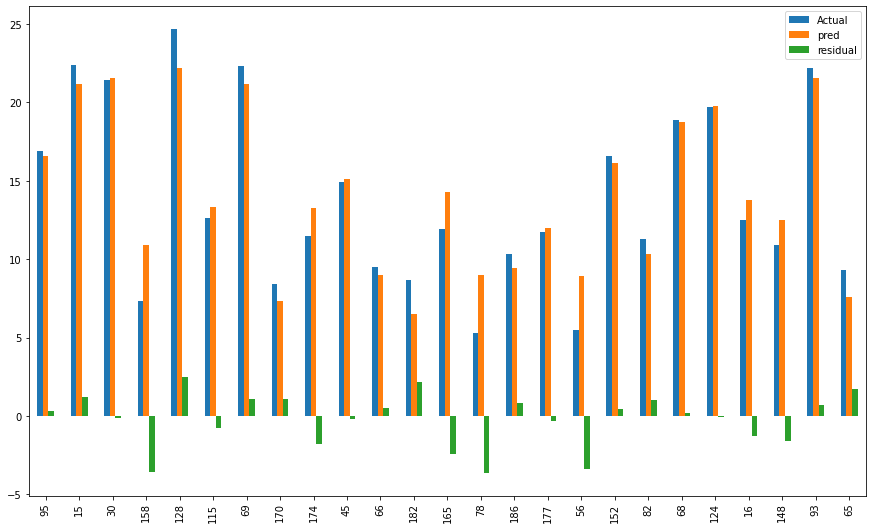

In [38]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show()

## Error Metrics

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.8609466508230368

In [25]:
mae = mean_absolute_error(y_test, y_pred)

mae



1.5116692224549084

In [26]:
mse = mean_squared_error(y_test, y_pred)

mse

# tahminler ile gerçek değerler (actual values) arasındaki farkları 
  # yani errorları ciddi anlamda cezalandırıyor.

3.7967972367152187

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

1.9485372043446383

In [28]:
sales_mean = df["sales"].mean()

sales_mean

14.0225

In [29]:
mae / sales_mean

# sales ortalamam 14 idi, mae ortalamam 1.5 idi. 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.
# demek oluyor ki tahminlerim ortalma olarak yüzde 10 civarında hatalı

0.10780311802138764

In [50]:
rmse / sales_mean

0.13895790367941796

## What is the concept of punishment for RMSE error metric?

In [59]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3200]}

variables2 = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3600]} 

# RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [53]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200


In [60]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [62]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
                       
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200


In [63]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
                       
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [57]:
# mae

df_2.residual.sum() / 3 # 166.66

166.66666666666666

In [64]:
df_3.residual.sum() / 3 

# pred'in bir değerini 3600 yaptığımda mae 166.66 dan 300 e çıktı!

300.0

In [58]:
# rmse 

((df_2.residual ** 2).sum() / 3) ** 0.5

173.20508075688772

In [65]:
((df_3.residual ** 2).sum() / 3) ** 0.5

369.68455021364724

## Evaluation Model

In [66]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [67]:
eval_metric(y_test, y_pred)

# modelimi test ettiğim test datamın eval metrik değelerini çıkarttım.

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.7967972367152187
RMSE 		: 1.9485372043446383


In [69]:
y_train_pred = model.predict(X_train)

In [70]:
eval_metric(y_train, y_train_pred)

# modelimi eğittiğim train datamın eval metrik değelerini çıkarttım. Test datamın eval metrik değerleri ile bunu kıyaslayacağım.

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072524
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

## Plotting residuals

In [71]:
residuals = y_test - y_pred

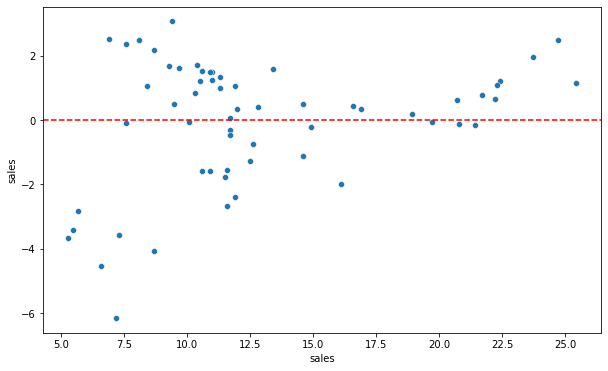

In [72]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

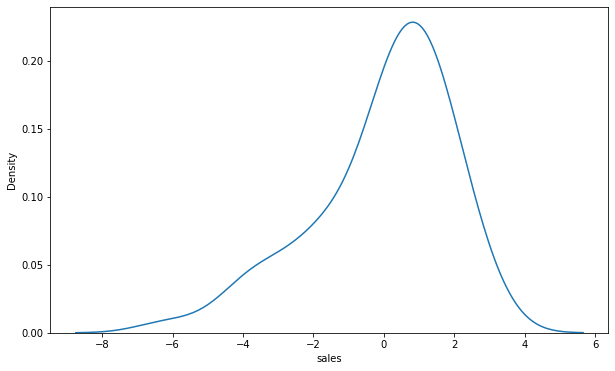

In [75]:
sns.kdeplot(residuals)

# left skewed olduğu görülüyor.

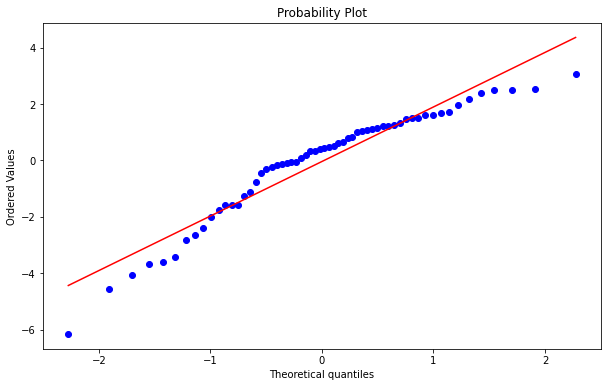

In [74]:
stats.probplot(residuals, dist="norm", plot=plt);

# verilerim kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

In [81]:
skew(residuals)

-0.9865673346742709

In [77]:
# pip install yellowbrick

!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


You should consider upgrading via the 'c:\users\hüseyin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [78]:
from yellowbrick.regressor import ResidualsPlot

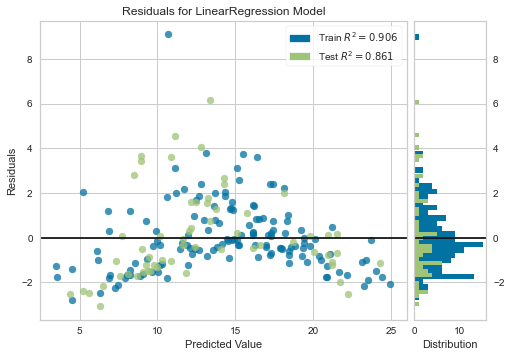

In [80]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

In [ ]:
from yellowbrick.regressor import PredictionError

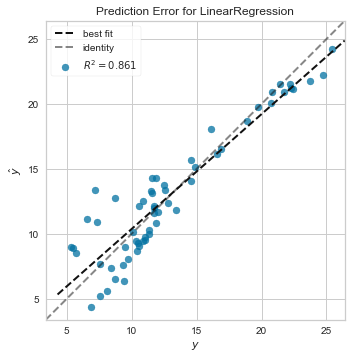

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Retraining Model on Full Data

In [86]:
final_model = LinearRegression()

In [87]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [89]:
final_model.coef_

# x (futurelarıma ait) katsayılarım.

array([ 0.04576465,  0.18853002, -0.00103749])

In [90]:
final_model.intercept_

2.9388893694594103

In [91]:
coef_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [92]:
adv = [[150, 20, 15]]

In [93]:
final_model.predict(adv)

array([13.55862413])

In [95]:
0.045765 * 150 + 0.188530 * 20 + -0.001037 * 15 +final_model.intercept_

13.558684369459408

In [96]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [98]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

## Feature importance (The effect of features on the predicted label)

In [100]:
coef_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [102]:
np.array(adv).reshape(3, 1)

# katsayılarla aynı boyuta getirdim ki bunları karşılıklı rahat çarpabileyim.

array([[150],
       [ 20],
       [ 15]])

In [103]:
coef_df * np.array(adv).reshape(3, 1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [104]:
6.864697 / 13.55862413

# TV, tahminim üzerinde yüzde 50 etkiye sahip

0.5062974630892729

In [105]:
3.770600 / 13.55862413

0.2780960637191142

In [106]:
-0.015562 / 13.55862413

-0.0011477565755043907

In [107]:
final_model.intercept_ / 13.55862413

# yeriye kalan yüzde 21 lik kısım da intercept'ten geliyormuş.

0.21675424742815777